In [ ]:
# 读取本地数据
import pandas as pd

# 获取所有回测数据
li = []
for i in range(10):
    file = f'data/bonds_{i}.xlsx'
    data = pd.read_excel(file, index_col=0)
    li.append(data)
df = pd.concat(li, axis=0)

In [ ]:
df[df['secShortNameBond']=='格力转债']

In [120]:
df

,SecID,tickerBond,secShortNameBond,tradeDate,closePriceBond,tickerEqu,secShortNameEqu,closePriceEqu,convPrice,bondPremDisc,bondTypeID,bondType,value,ratio,doubleLow
0,110030.XSHG,110030,格力转债,2018-01-02,105.400,600185,格力地产,5.77,7.24,25.7039,2020113,可转债,79.696133,0.322523,137.652340
1,110031.XSHG,110031,航信转债,2018-01-02,100.090,600271,航天信息,21.65,42.80,49.5059,2020113,可转债,50.584112,0.978685,197.958453
2,110032.XSHG,110032,三一转债,2018-01-02,126.640,600031,三一重工,9.48,7.43,-0.9508,2020113,可转债,127.590848,-0.007452,125.894768
3,110033.XSHG,110033,国贸转债,2018-01-02,118.080,600755,厦门国贸,10.21,8.81,2.1890,2020113,可转债,115.891033,0.018888,119.968815
4,110034.XSHG,110034,九州转债,2018-01-02,110.440,600998,九州通,19.30,18.52,6.2283,2020113,可转债,104.211663,0.059766,116.416622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,128046.XSHE,128046,利尔转债,2018-12-28,99.199,2258,利尔化学,13.14,18.82,29.3797,2020113,可转债,69.819341,0.420795,141.278542
18273,128047.XSHE,128047,光电转债,2018-12-28,106.201,2179,中航光电,33.68,40.26,22.5448,2020113,可转债,83.656234,0.269493,133.150295
18274,128048.XSHE,128048,张行转债,2018-12-28,99.500,2839,张家港行,5.35,6.06,11.2162,2020113,可转债,88.283828,0.127047,112.204673
18275,128049.XSHE,128049,华源转债,2018-12-28,91.800,2787,华源控股,6.60,7.58,4.7288,2020113,可转债,87.071240,0.054309,97.230909


0        105.40
1        100.09
2        126.64
3        118.08
4        110.44
          ...  
18272     99.20
18273    106.20
18274     99.50
18275     91.80
18276     93.02
Name: closePriceBond, Length: 18277, dtype: float64

In [119]:
# 初始化数据
def initialize():
    global MyPosition, MyCash, HoldNum, df, posValue, today_data, today_low
    MyPosition = {}  #持仓列表
    MyCash = 1000000  #现金
    HoldNum = 10  #持债支数
    posValue = [] #当前市值
    df['value'] = 100/df['convPrice']*df['closePriceEqu']
    df['ratio']=df['closePriceBond']/df['value']-1
    df['doubleLow'] = df['closePriceBond'] + df['ratio']*100
    df['closePriceBond'] = df['closePriceBond'].apply(lambda x:round(x,2))

In [144]:
def every_day(today_date):
    print(f'-----今日{today_date}')
    check_data(today_date)
    sell_all()
    buy_all()

In [103]:
today_low

{'久立转2',
 '亚太转债',
 '众信转债',
 '众兴转债',
 '兄弟转债',
 '国祯转债',
 '小康转债',
 '时达转债',
 '泰晶转债',
 '特一转债'}

In [148]:
# 初始化所有数据
initialize()

date_li = get_all_date()
for date in date_li:
    every_day(date)
    
print(posValue)

-----今日2018-01-02
今日总市值0
以101.8买入泰晶转债#100000.0钱,共982.3182711198428股
以95.5买入久立转2#100000.0钱,共1047.1204188481674股
以100.45买入兄弟转债#100000.0钱,共995.5201592832254股
以95.4买入时达转债#100000.0钱,共1048.2180293501049股
以105.77买入永东转债#100000.0钱,共945.4476694714948股
以95.24买入亚太转债#100000.0钱,共1049.9790004199917股
以98.2买入特一转债#100000.0钱,共1018.3299389002036股
以112.12买入国祯转债#100000.0钱,共891.9015340706386股
以107.17买入宝信转债#100000.0钱,共933.0969487729775股
以104.2买入众信转债#100000.0钱,共959.6928982725527股
-----今日2018-01-03
今日总市值1005801.6398137056
以108.0卖出宝信转债#933.0969487729775股
以99.69买入众兴转债#100774.47046748157钱,共1010.8784278009988股
-----今日2018-01-04
今日总市值1019368.3380554859
以113.32卖出永东转债#945.4476694714948股
以100.58买入小康转债#107138.12990450978钱,共1065.2031209436248股
-----今日2018-01-05
今日总市值1030701.1353155419
以106.7卖出兄弟转债#995.5201592832254股
以111.8买入永东转债#106222.00099552015钱,共950.1073434304128股
-----今日2018-01-08
今日总市值1032959.4453648847
-----今日2018-01-09
今日总市值1024368.4075310844
以111.39卖出永东转债#950.1073434304128股
以104.18买入蒙电转债#105832.45698471369钱,共101

In [149]:
len(posValue)

243

In [131]:
def get_all_date():
    global df
    date_li = list(set(df['tradeDate']))
    date_li.sort()
    return date_li

In [141]:
def get_last_price(name):
    global today_data
    try:
        price = today_data[today_data['secShortNameBond']==name]['closePriceBond'].iloc[0]
    except:
        date_str = today_data['tradeDate'].iloc[0]
        print(f'{date_str},{name}没有读取到')
    return price

'2018-07-16'

In [147]:

# 按天回测
def check_data(today_date):    
    global MyPosition, MyCash, HoldNum, df, posValue, today_data, today_low
        
    #   每日市场价
    today_data = df[df['tradeDate'] == today_date]
    #   每日双低价
    today_data_low = today_data.sort_values('doubleLow')[:HoldNum]
    today_low = set(today_data_low['secShortNameBond'])
    
    # 进入新的一天，计算当前市值（默认持有可转债的今日一定存在）
    today_pos_value = sum(get_last_price(pos)*MyPosition[pos] for pos in MyPosition)
    print(f'今日总市值{today_pos_value}')
    posValue.append(today_pos_value)

def sell_all():
    global MyPosition, HighValue, MyCash, Withdraw, HoldNum, df, today_data,today_low
        # 卖出
   
    need_sell = []
    for pos in MyPosition.keys():
        if pos in today_low:
    #         仍旧是双低
            continue
        else:
    #         不在是双低
    #         卖出
            need_sell.append(pos)
    for pos in need_sell:
        sell(pos)
    
def buy_all():
    global MyPosition, HighValue, MyCash, Withdraw, HoldNum, df, posValue,today_data,today_low
    # 买入
    # 计算需买入
    need_buy = []
    for pos in today_low:
        if pos in MyPosition.keys():
    #         已持有
            continue
        else:
    #         未持有
            need_buy.append(pos)

    #  均匀分配资金到买入，此处姑且视为可以买入带小数点的股票
    if len(need_buy) != 0:
        can_buy_cash = MyCash/len(need_buy)
        for item in need_buy:
            buy(item,can_buy_cash)

In [99]:
def buy(name,cash):
    global MyPosition,MyCash
    price = get_last_price(name)
    print(f'以{price}买入{name}#{cash}钱,共{cash/price}股')
    MyCash -= cash
    MyPosition[name] = cash/price 

In [142]:
def sell(name):
    global MyPosition,MyCash
    price = get_last_price(name)
    print(f'以{price}卖出{name}#{MyPosition[name]}股')
    MyCash += price * MyPosition[name]
    del MyPosition[name]

In [160]:
res = pd.DataFrame(posValue[1:])

<AxesSubplot:>

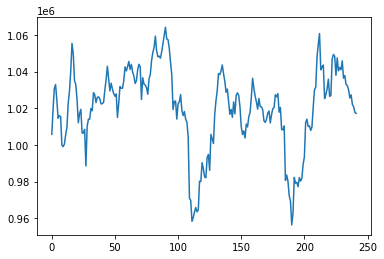

In [161]:
res[0].plot()